# BACS3013 Data Science Assignment - Diabetes

In [146]:
# 1. choose model class
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import warnings
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


## Import the data

In [147]:
df = pd.read_csv('diabetes_data_upload.csv')

## Data Preprocessing

In [148]:
df.isnull().any().any() # check the missing value

False

In [149]:
df.head() # print the data from head

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [150]:
df.tail() # print the data from tail

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [151]:
# Get the column variable
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [152]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 520
Number of Columns: 17


In [153]:
# Test if missing value exist
df.isna().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [154]:
df.info() # print the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [155]:

# Mapping for Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Mapping for Yes/No Data
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
                  'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
                  'Alopecia', 'Obesity']

for column in binary_columns:
    df[column] = df[column].map({'No': 0, 'Yes': 1})

# Mapping for Positive/Negative Data
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [156]:
# print the correlation of the class
correlation_with_class = df.corr()['class'].abs().sort_values(ascending=False)

print(correlation_with_class)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Name: class, dtype: float64


<Axes: >

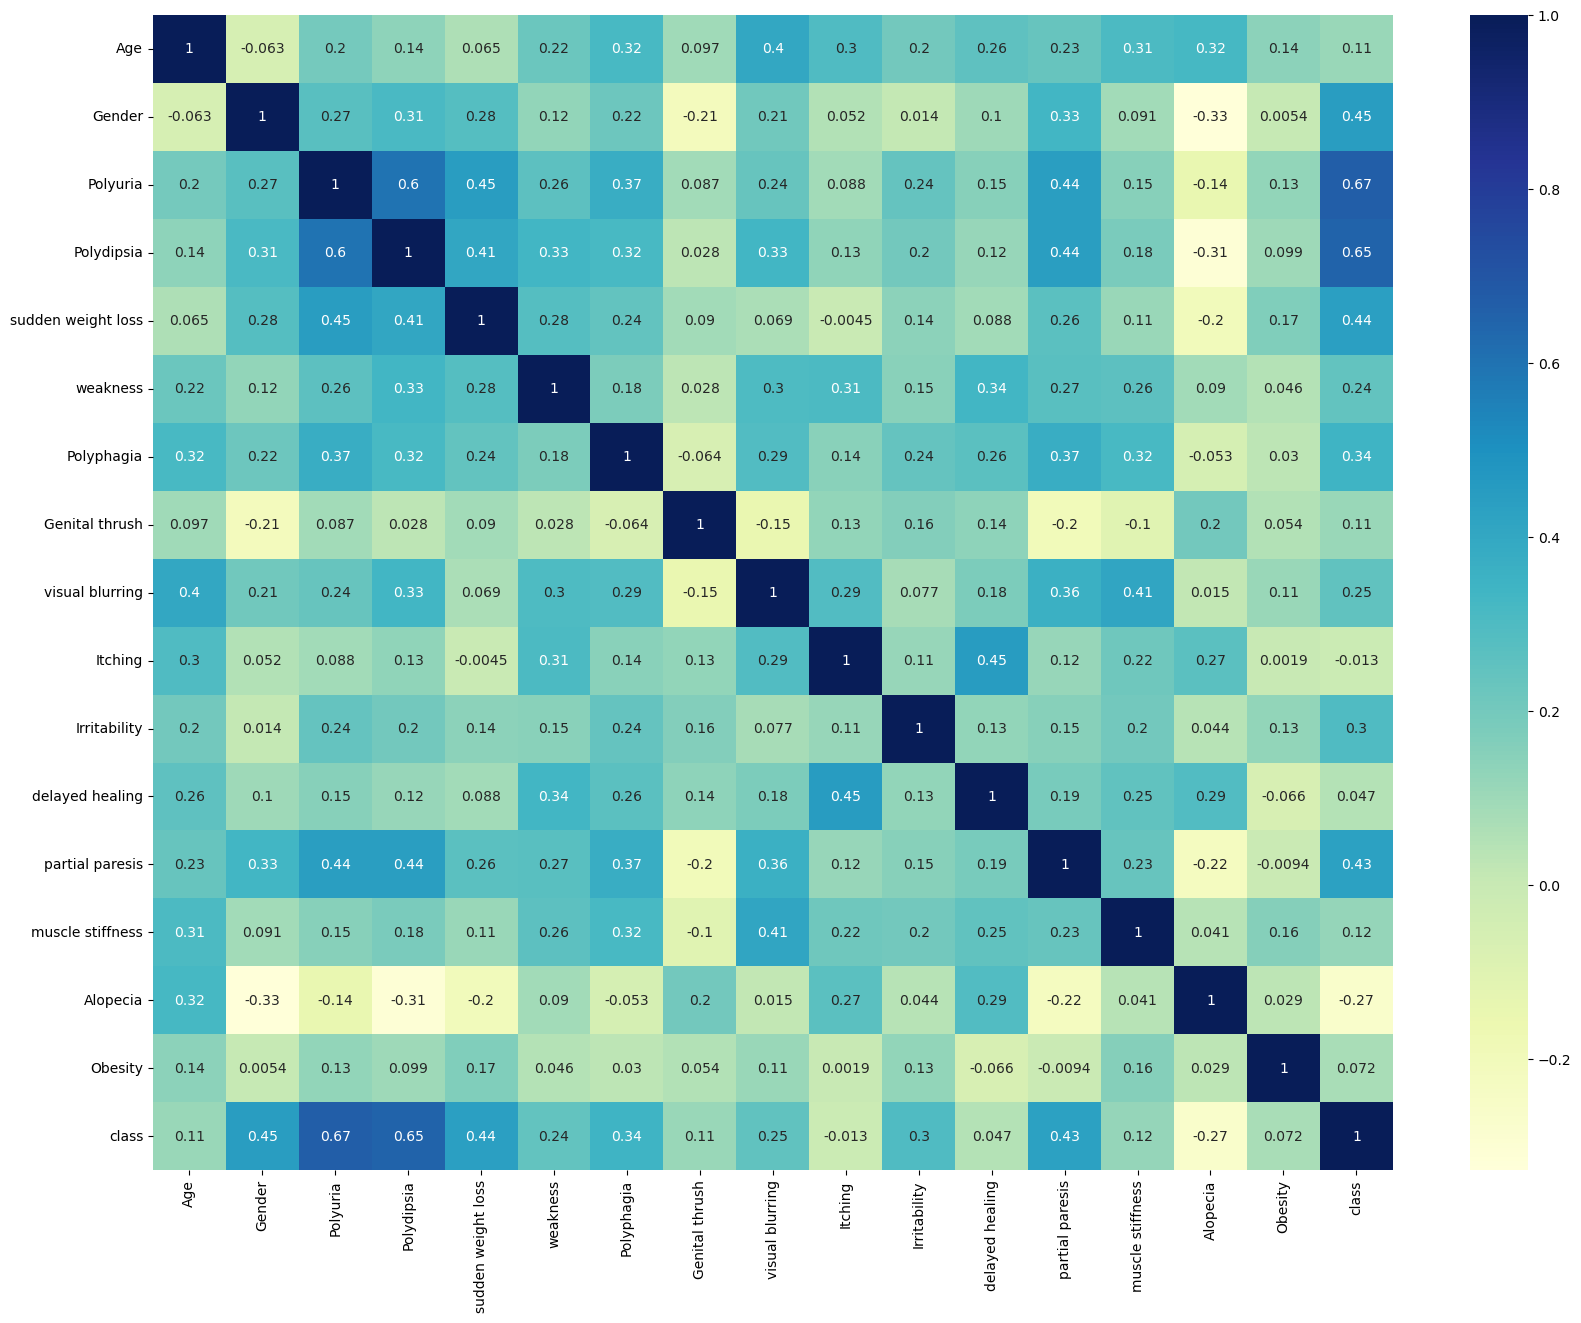

In [157]:
# Display the heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [158]:
# show the description of the data
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
p_values = []
for column in df.drop(columns=['class']):
    feature_positive = df[df['class'] == 1][column]
    feature_negative = df[df['class'] == 0][column]
    _, p_value = ttest_ind(feature_positive, feature_negative)
    p_values.append((column, p_value))

# Select columns with p-value less than a significance level (e.g., 0.05)
significant_columns = [col for col, p_value in p_values if p_value < 0.05]

# Keep only the significant columns
df = df[['class'] + significant_columns]

df.head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
0,1,40,0,0,1,0,1,0,0,0,0,0,1,1
1,1,58,0,0,0,0,1,0,0,1,0,1,0,1
2,1,41,0,1,0,0,1,1,0,0,0,0,1,1
3,1,45,0,0,0,1,1,1,1,0,0,0,0,0
4,1,60,0,1,1,1,1,1,0,1,1,1,1,1


## Data Preparation


### Data Cleaning And Remove Outliers (WS) 
##### how to identify outlier


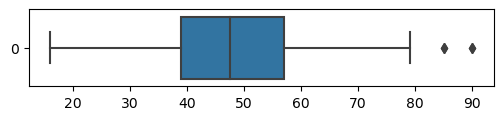

In [160]:
#show age box plot
plt.figure(figsize=(6,1))
sns.boxplot(df["Age"], orient="h")
plt.show()

In [161]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = q3 - q1


outliers = df[((df["Age"]<(q1-1.5*IQR)) | (df["Age"]>(q3+1.5*IQR)))]
outliers

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
101,1,85,0,1,1,1,1,1,1,1,0,1,1,0
102,1,90,1,0,1,1,0,0,1,1,0,0,1,1
185,1,85,0,1,1,1,1,1,1,1,0,1,1,0
186,1,90,1,0,1,1,0,0,1,1,0,0,1,1


In [162]:
df = df[~((df["Age"]<(q1-1.5*IQR)) | (df["Age"]>(q3+1.5*IQR)))]
df.head()

,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Irritability,partial paresis,muscle stiffness,Alopecia
0,1,40,0,0,1,0,1,0,0,0,0,0,1,1
1,1,58,0,0,0,0,1,0,0,1,0,1,0,1
2,1,41,0,1,0,0,1,1,0,0,0,0,1,1
3,1,45,0,0,0,1,1,1,1,0,0,0,0,0
4,1,60,0,1,1,1,1,1,0,1,1,1,1,1


### Features Engineering (Roy)

# Split Data Into Training Set and Testing Set,  Normalizing Data (YJ)


In [163]:
X = df.drop(columns=['class'])  # Features (excluding the target variable)
y = df['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-Nearest Neighbours (KNN) (compare the neighbours)

In [164]:
# consider the labels of the 5 nearest data points to a given input when making a prediction.
knn = KNeighborsClassifier(n_neighbors = 1) 

# Fit model to data
knn.fit(X_train, y_train)

# Predict on new data
X_test = np.array(X_test)
knn_pred = knn.predict(X_test)

# Evaluate performance
knn_accuracyScore = (accuracy_score(y_test, knn_pred)) * 100
print('Accuracy Score : {:.3f}%'.format(knn_accuracyScore))


Accuracy Score : 93.269%


In [165]:
print(classification_report(y_test,knn_pred))
knn_pre = precision_score(y_test, knn_pred) * 100
knn_rec = recall_score(y_test, knn_pred)* 100
knn_f1 = f1_score(y_test, knn_pred)* 100

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      0.92      0.94        62

    accuracy                           0.93       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.93      0.93      0.93       104



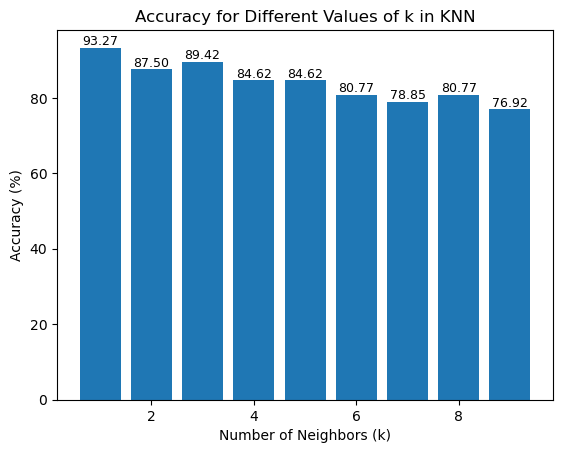

In [166]:
# Try different values of k for KNN
k_values = range(1, 10)  

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = (accuracy_score(y_test, y_pred)) * 100
    accuracies.append(accuracy)

# Create a bar chart to compare accuracies for different k values
plt.bar(k_values, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Values of k in KNN')

# Add the numeric values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    
plt.show()




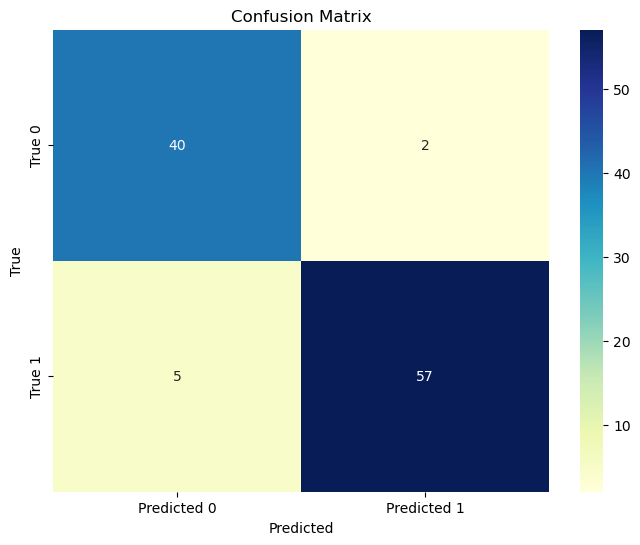

In [167]:
cm = confusion_matrix(y_test, knn_pred)

# show the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Support Vector Machine (SVM / SVC)

In [168]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

start_time = time.time() 
svc_grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
svc_grid.fit(X_train, y_train)
svc_pred=svc_grid.predict(X_test)
end_time = time.time()
elapsed_time = (end_time - start_time)
average_time = elapsed_time / 125

print(f"\nTotal Time taken: {elapsed_time:.4f} seconds")
print(f"Average Time taken: {average_time:.4f} seconds")
# average

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.663 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.614 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [169]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1, probability=True)


In [170]:
print(classification_report(y_test,svc_pred))
svc_pre = precision_score(y_test, svc_pred) * 100
svc_rec = recall_score(y_test, svc_pred)* 100
svc_f1 = f1_score(y_test, svc_pred)* 100


              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.94      0.98      0.96        62

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



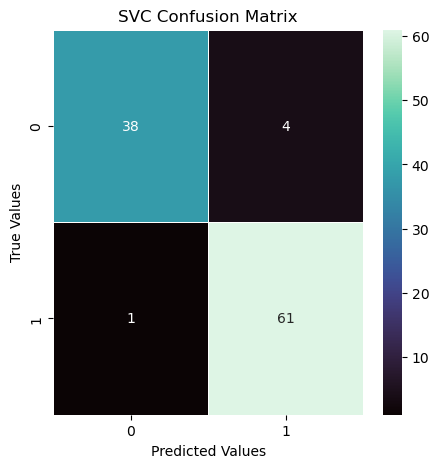

In [171]:
svc_cm = confusion_matrix(y_test,svc_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(svc_cm,annot=True, fmt='d',linewidths=0.5,cmap='mako')
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


In [172]:
svc_FP = (svc_cm[0][1]).astype(float)  
svc_TN = (svc_cm[0][0]).astype(float)
svc_TP = (svc_cm[1][1]).astype(float)  
svc_FN = (svc_cm[1][0]).astype(float)
    

In [173]:
# Fall out or false positive rate
svc_FPR = svc_FP/(svc_FP+svc_TN)*100
svc_TPR = svc_TP/(svc_TP+svc_FN)*100
print("False Positive Rate of SVC : " + str(round(svc_FPR,2)) + " %")
print("True Positive Rate of SVC : " + str(round(svc_TPR,2)) + " %")
svc_acc = (svc_grid.score(X_test, y_test)) * 100
print('SVC accuracy : {:.2f}%'.format(svc_acc))


False Positive Rate of SVC : 9.52 %
True Positive Rate of SVC : 98.39 %
SVC accuracy : 95.19%


### Random Forest

1.We import the necessary libraries.

2.Load the Iris dataset.

3.Split the dataset into training and testing sets.

4.Create a Random Forest classifier 

5.Train the classifier on the training data.

6.Make predictions on the test data.

7.Calculate and print the accuracy of the model.


In [174]:
# Create a Random Forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=250, random_state=42)

# Train the classifier on the training data
rfc_classifier.fit(X_train, y_train)

# Make predictions on the test data
rfc_pred = rfc_classifier.predict(X_test)

# Calculate the accuracy of the model
rfc_acc = accuracy_score(y_test, rfc_pred) * 100
print("Accuracy: {:.3f}%".format(rfc_acc))

Accuracy: 97.115%


In [175]:
print(classification_report(y_test,rfc_pred))
rfc_pre = precision_score(y_test, rfc_pred) * 100
rfc_rec = recall_score(y_test, rfc_pred)* 100
rfc_f1 = f1_score(y_test, rfc_pred)* 100


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.98      0.98        62

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



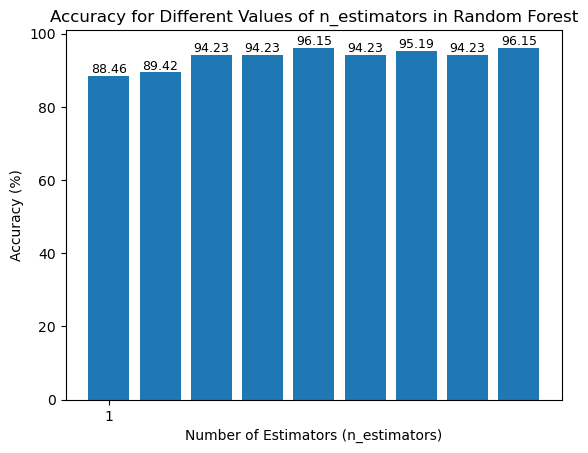

In [176]:
# Try different values of n_estimators for Random Forest
n_estimators_values = range(1, 10) 

accuracies = []

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = (accuracy_score(y_test, y_pred)) * 100
    accuracies.append(accuracy)

# Create a bar chart to compare accuracies for different n_estimators values
plt.bar(n_estimators_values, accuracies)
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Values of n_estimators in Random Forest')

# Add the numeric values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i + 1, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.xticks(np.arange(min(n_estimators_values), max(n_estimators_values)+1, 10))  # Adjust x-axis ticks for clarity
plt.show()

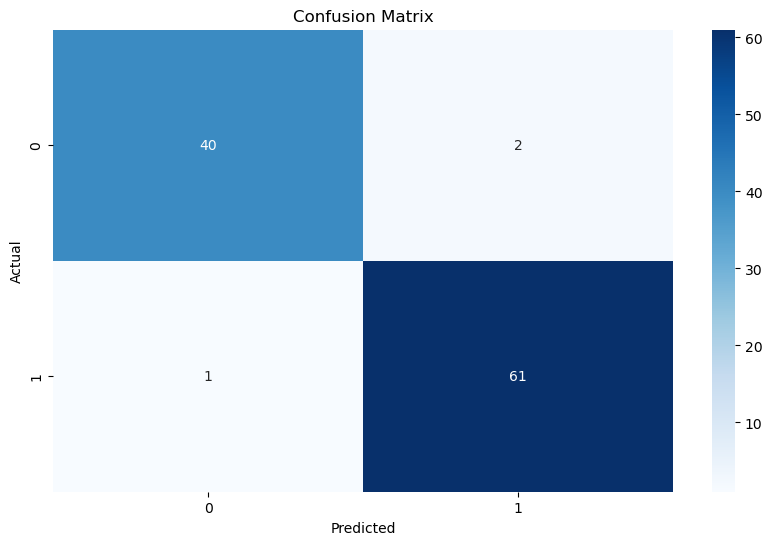

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you've already defined and populated y_test and rfc_pred
# y_test contains the actual test labels
# rfc_pred contains the predicted labels from your Random Forest Classifier

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, rfc_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

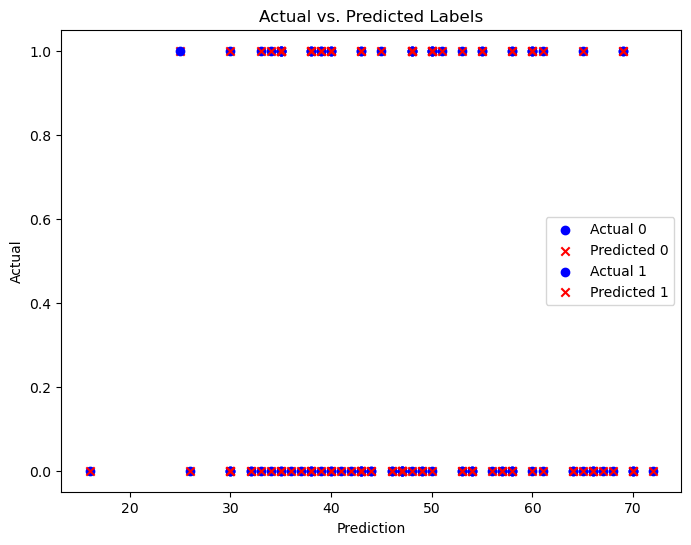

In [178]:

# Create a scatter plot to visualize actual vs. predicted labels
plt.figure(figsize=(8, 6))

for class_val in np.unique(y):
    actual_points = np.where(y_test == class_val)[0]
    predicted_points = np.where(rfc_pred == class_val)[0]
    
    plt.scatter(X_test[actual_points, 0], X_test[actual_points, 1], c='blue', marker='o', label=f'Actual {class_val}')
    plt.scatter(X_test[predicted_points, 0], X_test[predicted_points, 1], c='red', marker='x', label=f'Predicted {class_val}')

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

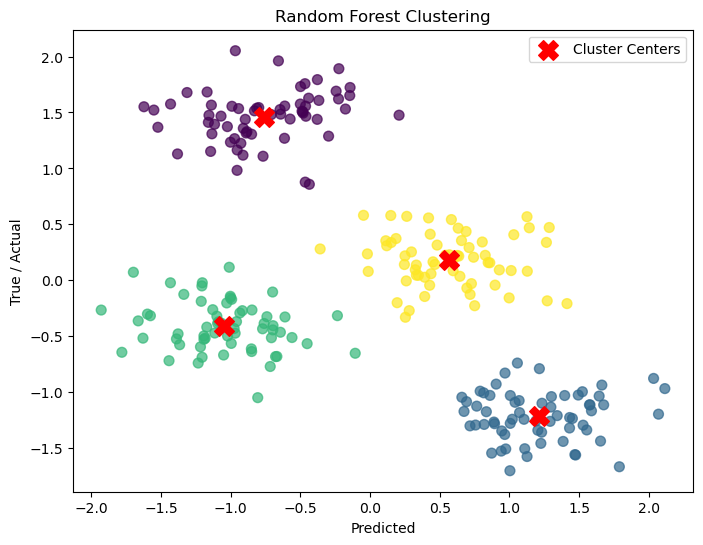

In [179]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Generate example data
X, y = make_blobs(n_samples=250, centers=4, cluster_std=0.60, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a KMeans clustering model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get the cluster labels and centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Predicted')
plt.ylabel('True / Actual')
plt.title('Random Forest Clustering')
plt.legend()
plt.show()


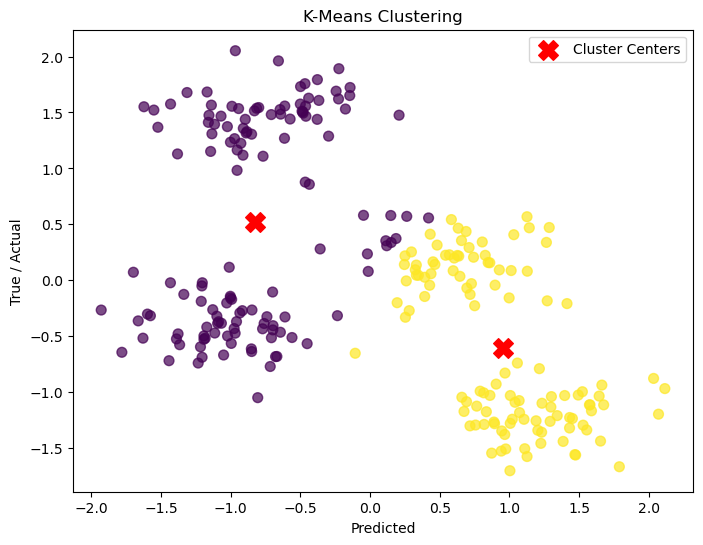

In [180]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Generate example data
X, y = make_blobs(n_samples=250, centers=4, cluster_std=0.60, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a KMeans clustering model with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get the cluster labels and centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Predicted')
plt.ylabel('True / Actual')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


### Logistic Regression

In [181]:
# Create the linear regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = model.predict(X_test)


# Calculate the accuracy
lr_acc = (accuracy_score(y_test, y_pred)) * 100
print("Accuracy:, {:.3f}%".format(lr_acc))

Accuracy:, 96.154%


In [182]:
print(classification_report(y_test,lr_pred))
lr_pre = precision_score(y_test, lr_pred) * 100
lr_rec = recall_score(y_test, lr_pred)* 100
lr_f1 = f1_score(y_test, lr_pred)* 100


              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.91      0.94      0.92        62

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



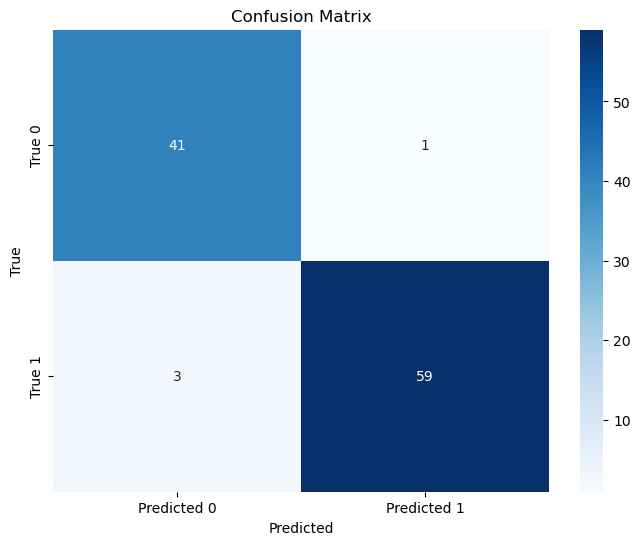

In [183]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## Evaluation (Kaon)

In [184]:
al_name = ['KNN','SVC','Random Forest', 'Logistic Regression']
acc_all = [(al)for al in [knn_accuracyScore, svc_acc, rfc_acc, lr_acc]]
pre_all = [(al)for al in [knn_pre, svc_pre, rfc_pre,lr_pre]]
rec_all = [(al)for al in [knn_rec,svc_rec , rfc_rec,lr_rec]]
f1_all = [(al)for al in [knn_f1,svc_f1, rfc_f1,lr_f1]]

### Accuracy

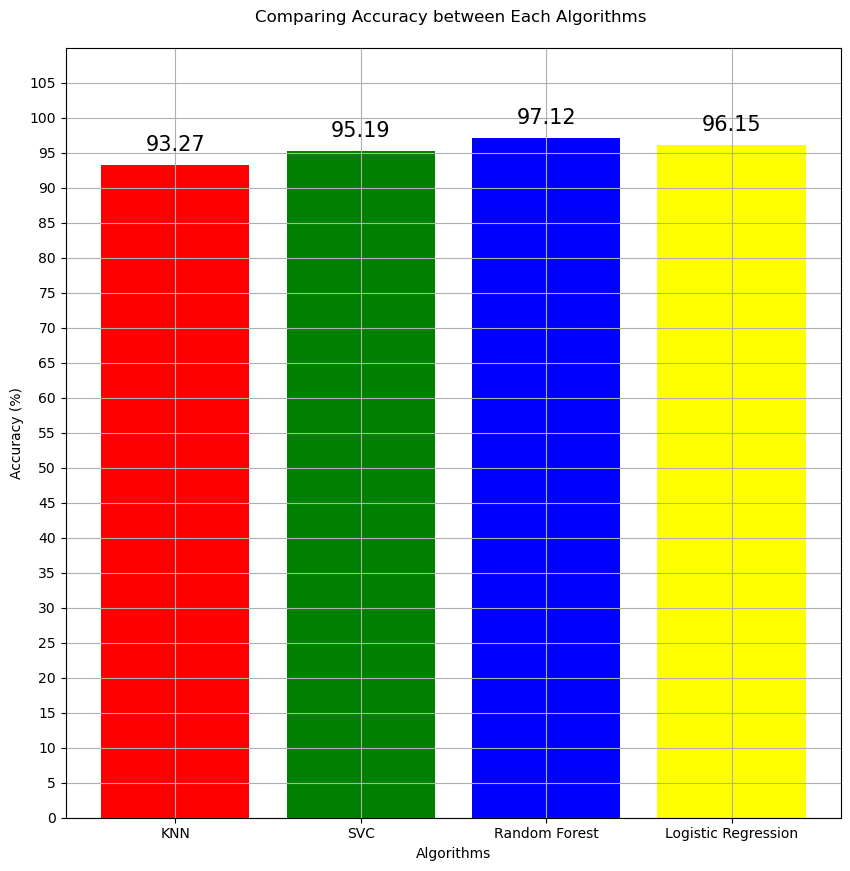

In [185]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=acc_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)


plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Accuracy between Each Algorithms \n")
plt.ylabel("Accuracy (%)")
plt.xlabel("Algorithms")
plt.show()


### Precision

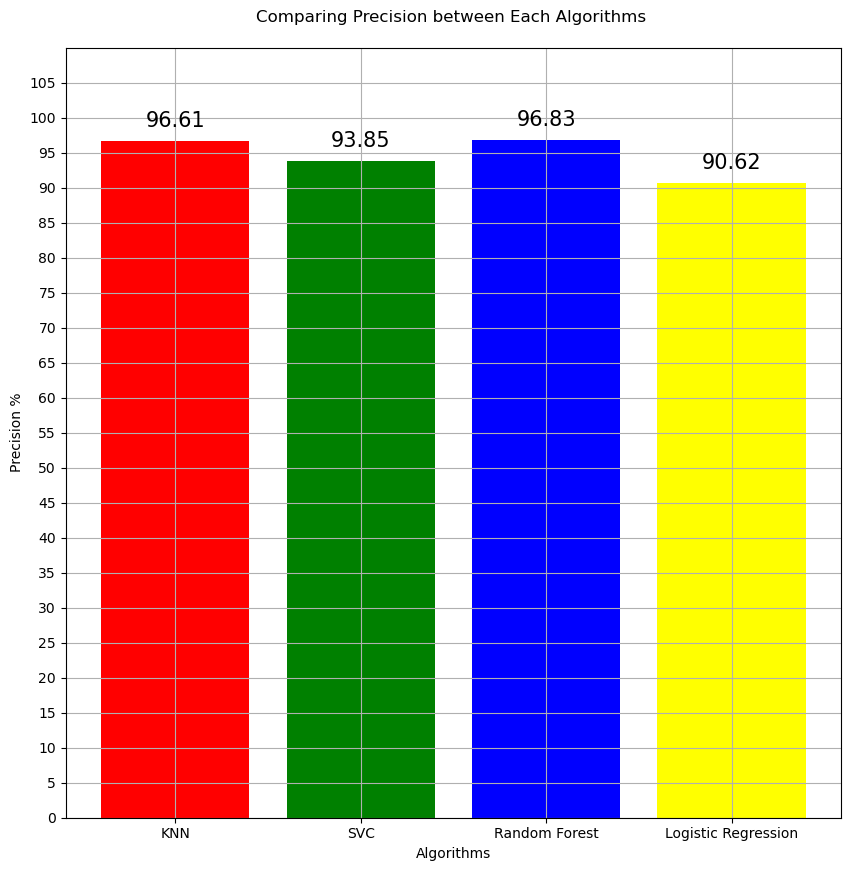

In [186]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=pre_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Precision between Each Algorithms \n")
plt.ylabel("Precision %")
plt.xlabel("Algorithms")
plt.show()

### Recall

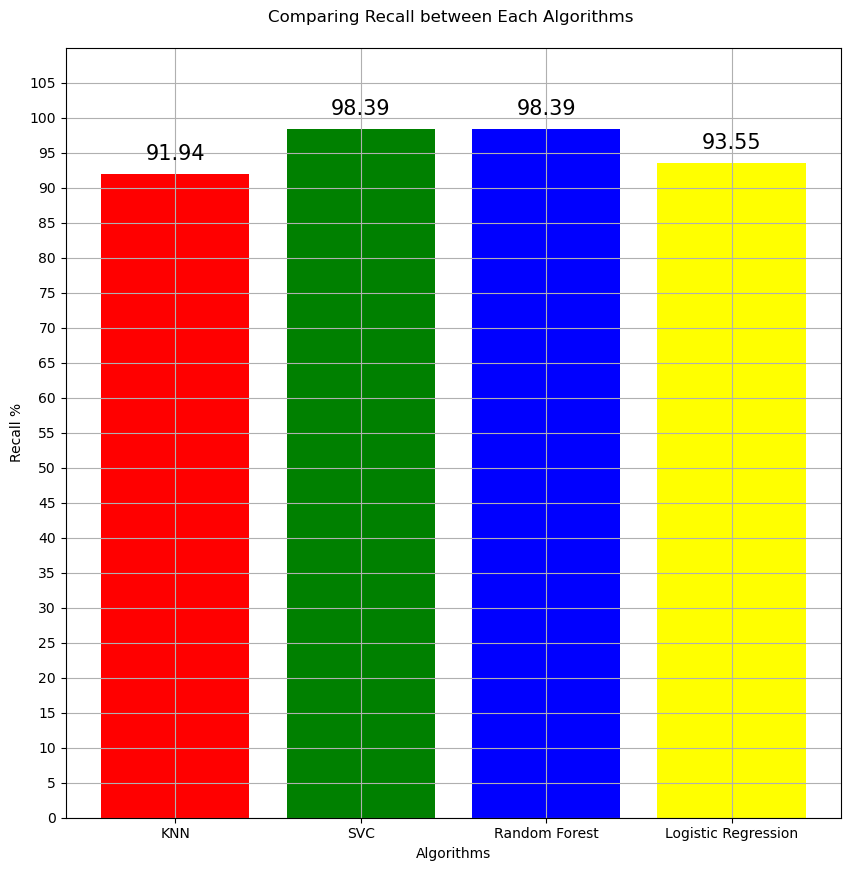

In [187]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=rec_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)


plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing Recall between Each Algorithms \n")
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
plt.show()

### F1 - Score

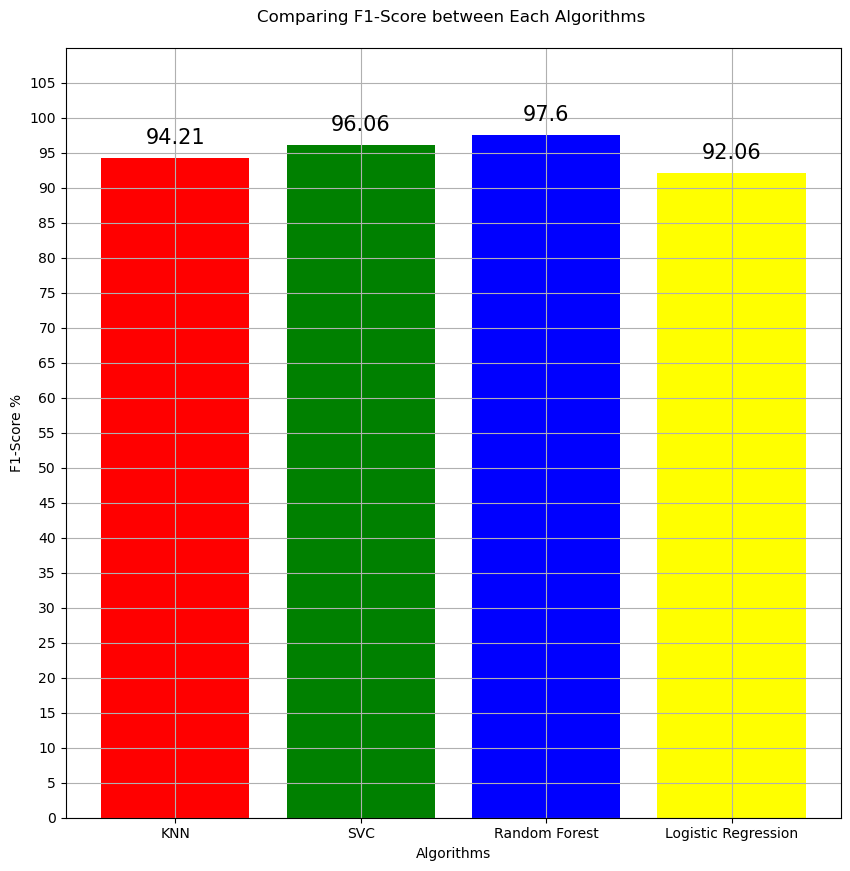

In [188]:
plt.figure(figsize=(10,10))
plt.grid(True)
bars = plt.bar(x=al_name, height=f1_all,color=['red', 'green', 'blue', 'yellow'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', color='black', fontsize=15)

plt.xticks()
plt.ylim((0,110))
plt.yticks(np.arange(0,110,5))
plt.title("Comparing F1-Score between Each Algorithms \n")
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")
plt.show()

## Deployment